In [3]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [71]:
device = torch.device('cpu')

if torch.backends.mps.is_available():
    device = torch.device('mps')
elif torch.cuda.is_available():
    device = torch.device('gpu')

device

device(type='mps')

In [72]:
def fix_path(path):
    return "./data/images/" + path

train_df = pd.read_csv('./data/im2latex_train.csv')
val_df = pd.read_csv('./data/im2latex_validate.csv')
test_df = pd.read_csv('./data/im2latex_test.csv')

dataframes = [train_df, val_df, test_df]

for df in dataframes:
    df['image'] = df['image'].map(lambda x: fix_path(x))

train_df

,formula,image
0,\widetilde \gamma _ { \mathrm { h o p f } } \s...,./data/images/66667cee5b.png
1,"( { \cal L } _ { a } g ) _ { i j } = 0 , \ \ \...",./data/images/1cbb05a562.png
2,S _ { s t a t } = 2 \pi \sqrt { N _ { 5 } ^ { ...,./data/images/ed164cc822.png
3,\hat { N } _ { 3 } = \sum \sp f _ { j = 1 } a ...,./data/images/e265f9dc6b.png
4,"\, ^ { * } d \, ^ { * } H = \kappa \, ^ { * } ...",./data/images/242a58bc3a.png
...,...,...
75270,\epsilon ^ { a _ { + } } ( x ) T ^ { a _ { + }...,./data/images/17f012d3b9.png
75271,G = d U ^ { 1 } d V ^ { 1 } + d U ^ { 2 } d V ...,./data/images/1bcd3aca22.png
75272,"\psi * \chi \equiv V _ { ( \infty , - 1 ) } ^ ...",./data/images/4716707d22.png
75273,D ^ { \prime \prime } = D ^ { \prime } D + \xi...,./data/images/49efc685a3.png


In [73]:
class ImagesDataset(Dataset):
    def __init__(self, image_paths, formulas, transform=None):
        self.image_paths = image_paths
        self.transform = transform
        self.formulas = formulas

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = Image.open(image_path)
        formula = self.formulas[index]

        if self.transform:
            image = self.transform(image)

        return image, formula


transform = transforms.Compose([
    transforms.Resize((224, 600)),  # Resize to a specific size
    transforms.ToTensor(),           # Convert to tensor
])

In [74]:
# HYPERPARAMETERS
# -------------------------------------------------
BATCH_SIZE = 32
# -------------------------------------------------

train_dataset = ImagesDataset(train_df['image'], train_df['formula'], transform=transform)
val_dataset = ImagesDataset(val_df['image'], val_df['formula'], transform=transform)
test_dataset = ImagesDataset(test_df['image'], test_df['formula'], transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

'{ \\cal M } = ( { \\bf R } ^ { 8 } ) ^ { N } / { \\cal S } _ { N } \\ .'

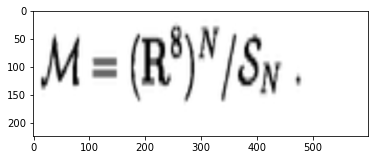

In [75]:
im, label = next(iter(train_dataloader))

plt.imshow(im[0][0], cmap='gray')
label[0]